## Comcast Telecom Consumer Complaints 

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

**Data Dictionary**

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone
- Analysis Task

Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Task 1** : Import data into Python environment

In [2]:
comcast_df = pd.read_csv('C:/Users/Workstation/OneDrive/Desktop/Data Science_Material/Data Science with Python/Python_Projects/Comcast Telecom Consumer Complaints/Comcast_telecom_complaints_data.csv')
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


Data Preprocessing

In [3]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
comcast_df.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

**Task 2** : Provide the trend chart for the number of complaints at monthly and daily granularity levels.

To perform this task, 'Date_month_year' would be our target attribute.
- We have to change the datatype from 'object' to 'datetime'

In [5]:
comcast_df['date_index'] = comcast_df['Date_month_year'] + " " + comcast_df['Time']

In [6]:
comcast_df['date_index'] = pd.to_datetime(comcast_df['date_index'])
comcast_df['Date_month_year'] = pd.to_datetime(comcast_df['Date_month_year'])

In [7]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  date_index                   2224 non-null 

In [8]:
comcast_df = comcast_df.set_index(comcast_df['date_index'])

- Extract "Month", "date" and "Days of week" using lambda function

In [9]:
comcast_df['Month']=comcast_df['Date_month_year'].apply(lambda x: x.month)
comcast_df['Date']=comcast_df['Date_month_year'].apply(lambda x: x.day)
comcast_df['Day_of_week']=comcast_df['Date_month_year'].apply(lambda x: x.dayofweek)

- map the weeks and months as follows:

In [10]:
d={0:'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
comcast_df['Day_of_week']=comcast_df['Day_of_week'].map(d)
s = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }
comcast_df['Month']=comcast_df['Month'].map(s)

In [11]:
comcast_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Month,Day_of_week
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Apr,Wed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,4,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Aug,Tue
2015-04-18 09:55:47,242732,Speed and Service,18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Apr,Sat
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Jul,Sun
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,May,Tue
2015-12-06 21:59:40,338519,ISP Charging for arbitrary data limits with ov...,6,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,Dec,Sun
2015-06-24 10:13:55,361148,Throttling service and unreasonable data caps,24,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,Jun,Wed
2015-06-23 18:56:14,359792,Comcast refuses to help troubleshoot and corre...,23,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23 18:56:14,Jun,Tue
2015-01-06 23:46:30,318072,Comcast extended outages,6,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06 23:46:30,Jan,Tue


**Number of Complaints month wise**

In [12]:
Months_df = comcast_df.groupby(comcast_df['Month']).size()
Months_df

Month
Apr     375
Aug      67
Dec      65
Feb      59
Jan      55
Jul      49
Jun    1046
Mar      45
May     317
Nov      38
Oct      53
Sep      55
dtype: int64

Text(0.5, 1.0, 'No of complaints on monthly basis')

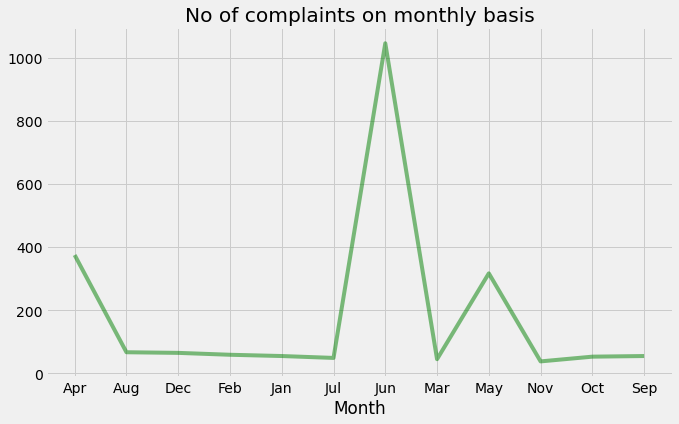

In [13]:
from matplotlib import style
style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.lineplot(data = Months_df, color = "green", alpha = 0.5)
plt.title("No of complaints on monthly basis")

**Number of Complaints on daily basis**

In [14]:
Daily_df = comcast_df.groupby(comcast_df['Date']).size()
Daily_df

Date
4     206
5     131
6     272
13     68
14     54
15     58
16     65
17     60
18     69
19     50
20     51
21     41
22     66
23    225
24    249
25    126
26     90
27     81
28     79
29     87
30     86
31     10
dtype: int64

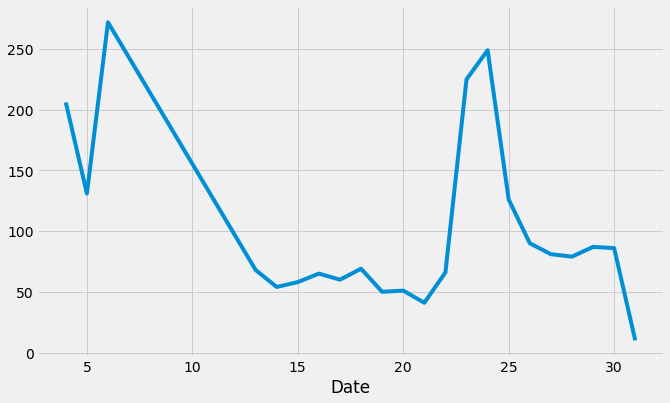

In [15]:
from matplotlib import style
style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.lineplot(data = Daily_df)

**Task 3** - Provide a table with the frequency of complaint types

In [16]:
Complaints_df = comcast_df[('Customer Complaint')].value_counts()[:15]
Complaints_df

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Comcast data cap             8
Comcast/Xfinity              8
Comcast internet             8
Data Cap                     8
Comcast data caps            8
Internet speed               8
Billing                      6
Name: Customer Complaint, dtype: int64

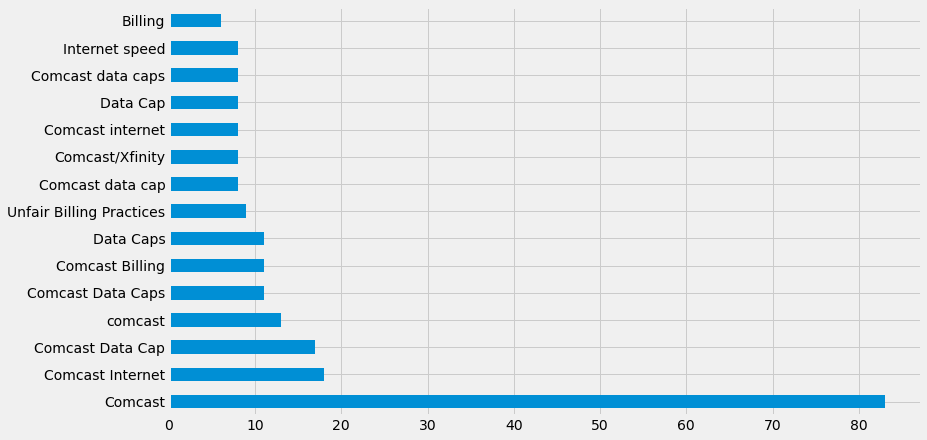

In [17]:
Complaints_df.plot(kind="barh", figsize=(12,7))

**Task - 4** : Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [18]:
comcast_df['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast_df["Status"]]
comcast_df.head(15)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Month,Day_of_week,Highlevel_Status
date_index,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Apr,Wed,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,4,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Aug,Tue,Closed
2015-04-18 09:55:47,242732,Speed and Service,18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Apr,Sat,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Jul,Sun,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,May,Tue,Closed
2015-12-06 21:59:40,338519,ISP Charging for arbitrary data limits with ov...,6,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,Dec,Sun,Closed
2015-06-24 10:13:55,361148,Throttling service and unreasonable data caps,24,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,Jun,Wed,Open
2015-06-23 18:56:14,359792,Comcast refuses to help troubleshoot and corre...,23,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23 18:56:14,Jun,Tue,Closed
2015-01-06 23:46:30,318072,Comcast extended outages,6,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06 23:46:30,Jan,Tue,Closed


In [19]:
comp_st=comcast_df.groupby(['State', 'Highlevel_Status']).size().unstack().fillna(0)
comp_st

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


- Provide state wise status of complaints in a stacked bar chart. 

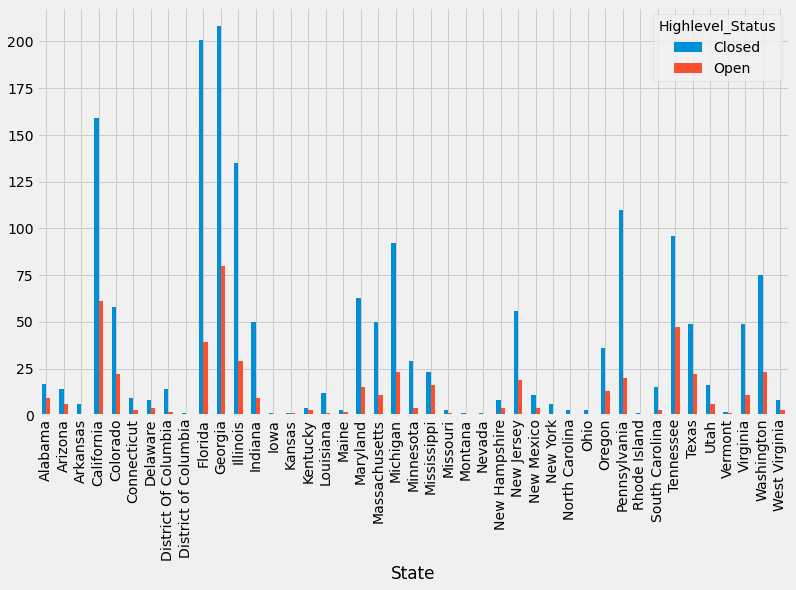

In [20]:
comp_st.plot(kind="bar", figsize=(12,7))

- Which state has the maximum complaints?

In [21]:
comcast_df.groupby(['State']).size().sort_values(ascending = False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

,Complaint count
State,
Georgia,288


**Conclusion:** "Georgia" state has the maximum complaint count

- Which state has the highest percentage of unresolved complaints?

In [22]:
un_cm=comcast_df.groupby(['State', 'Highlevel_Status']).size().unstack().fillna(0)
un_cm.sort_values('Closed', ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [23]:
un_cm['Unresolved_comp_perc']=un_cm['Open']/un_cm['Open'].sum()*100
un_cm.sort_values('Unresolved_comp_perc', ascending=False, axis=0)[:1]

Highlevel_Status,Closed,Open,Unresolved_comp_perc
State,,,
Georgia,208.0,80.0,15.473888


**Conclusion** - "Georgia" has the highest 15% of unresolved complaints

**Task - 5** : Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [24]:
int_ccc=comcast_df.groupby(['Received Via', 'Highlevel_Status']).size().unstack().fillna(0)
int_ccc['Resolved']=int_ccc['Closed']/int_ccc['Closed'].sum()*100

In [25]:
int_ccc['Resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Resolved, dtype: float64

**Conclusion** - 50% of Complaints received via "Costumer Care Call" and 49% of complaints recieved by "Internet" are resolved

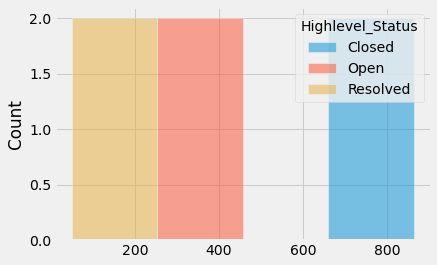

In [26]:
sns.histplot(int_ccc)

## Topic Modeling

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
txt = comcast_df['Customer Complaint'].values

In [29]:
txt

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [30]:
wc = WordCloud(width = 200, height = 100, background_color = "black", stopwords= STOPWORDS).generate(str(txt))

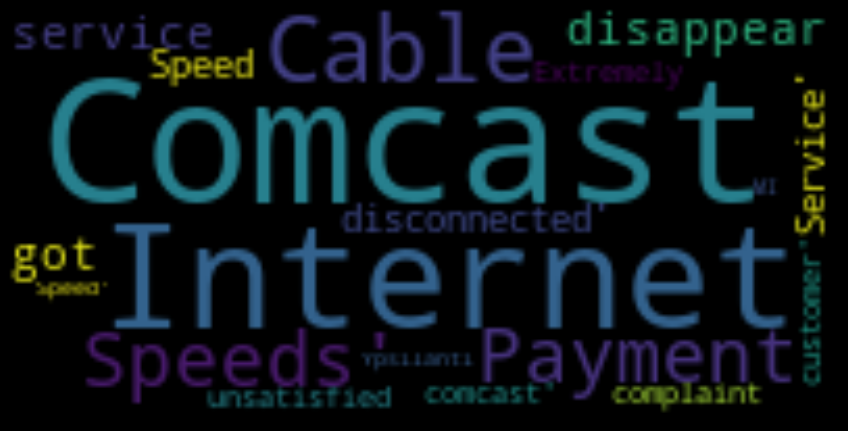

In [31]:
fig = plt.figure(figsize=(12,8), facecolor = 'k', edgecolor = 'w')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [33]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [34]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    pun_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in pun_free.split())
    return normalised

In [35]:
doc_complete = comcast_df['Customer Complaint'].tolist()

In [36]:
doc_clean = [clean(doc).split() for doc in doc_complete]

In [37]:
import gensim
from gensim import corpora

C:\Users\Workstation\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [38]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [39]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [40]:
from gensim.models import LdaModel

In [41]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics = NUM_TOPICS,id2word = dictionary, passes = 30 )

In [42]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.142*"comcast" + 0.072*"charge" + 0.062*"bill" + 0.046*"fee" + 0.042*"service" + 0.027*"without" + 0.022*"monthly" + 0.021*"refund" + 0.018*"account" + 0.015*"installation"')

(1, '0.191*"data" + 0.154*"cap" + 0.135*"comcast" + 0.036*"usage" + 0.023*"internet" + 0.022*"comcastxfinity" + 0.017*"overage" + 0.015*"limit" + 0.012*"xfinity" + 0.009*"lied"')

(2, '0.207*"internet" + 0.179*"service" + 0.042*"poor" + 0.025*"terrible" + 0.024*"xfinity" + 0.023*"issue" + 0.020*"connection" + 0.019*"connectivity" + 0.016*"customer" + 0.015*"intermittent"')

(3, '0.186*"billing" + 0.133*"comcast" + 0.081*"practice" + 0.063*"unfair" + 0.053*"service" + 0.041*"pricing" + 0.028*"xfinity" + 0.021*"monopolistic" + 0.012*"home" + 0.012*"back"')

(4, '0.202*"speed" + 0.125*"internet" + 0.046*"slow" + 0.022*"lack" + 0.019*"paying" + 0.017*"equipment" + 0.015*"promised" + 0.014*"low" + 0.014*"said" + 0.013*"shitty"')

(5, '0.112*"service" + 0.107*"comcast" + 0.065*"complaint" + 0.035*"customer" + 0.0

In [43]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)]=[i[0] for i in words]

In [44]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,comcast,data,internet,billing,speed,service,comcast,comcast,comcast
1,charge,cap,service,comcast,internet,comcast,price,billing,internet
2,bill,comcast,poor,practice,slow,complaint,monopoly,issue,service
3,fee,usage,terrible,unfair,lack,customer,cable,false,throttling
4,service,internet,xfinity,service,paying,contract,service,help,cable
5,without,comcastxfinity,issue,pricing,equipment,problem,pay,outage,access
6,monthly,overage,connection,xfinity,promised,deceptive,call,fraudulent,price
7,refund,limit,connectivity,monopolistic,low,bill,mb,switch,issue
8,account,xfinity,customer,home,said,get,throttled,day,business
9,installation,lied,intermittent,back,shitty,billing,plan,cramming,email


In [45]:
ldamodel.show_topic(0,topn = 20)

[('comcast', 0.14239642),
 ('charge', 0.07189764),
 ('bill', 0.06181226),
 ('fee', 0.046192948),
 ('service', 0.04162123),
 ('without', 0.02740895),
 ('monthly', 0.021698976),
 ('refund', 0.020737208),
 ('account', 0.017749347),
 ('installation', 0.014501368),
 ('modem', 0.013136873),
 ('increased', 0.012577949),
 ('high', 0.012490368),
 ('rate', 0.011632418),
 ('unauthorized', 0.011151497),
 ('overcharge', 0.009428489),
 ('year', 0.009261458),
 ('competition', 0.0077849785),
 ('added', 0.007304279),
 ('inconsistent', 0.0073033264)]

In [46]:
#!python -m pip install -U pyLDAvis

In [47]:
#import pyLDAvis

In [48]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [49]:
Lda_display = gensimvis.prepare(ldamodel,doc_term_matrix, dictionary, sort_topics = False)
pyLDAvis.display(Lda_display)